In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# PROBLEM 1

Select features and categories for practice

In [35]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns=["variety"])


cols = {x:x.replace(" (cm)", "") for x in df.columns}
df = df.rename(columns=cols)


df = pd.concat([df, y], axis=1)


df = df[["sepal length", "petal length", "variety"]][df["variety"] > 0]
df.head()

,sepal length,petal length,variety
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# PROBLEM 2

Data analysis

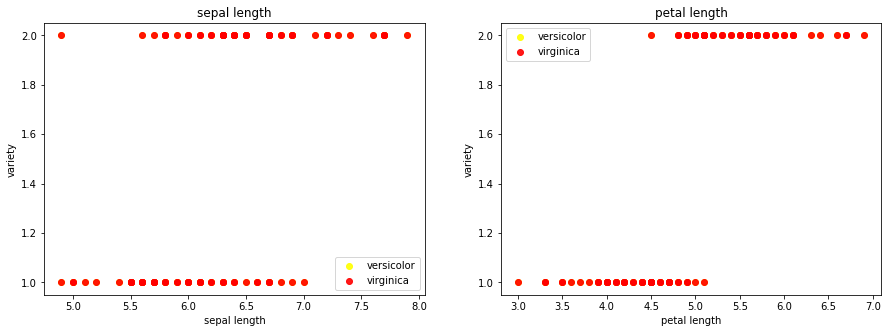

In [36]:
# Scatter Plot
figure = plt.figure(figsize=(15, 5))
variety_names = ["versicolor", "virginica"]
x_features = ["sepal length", "petal length"]
colors = ["yellow", "red"]


for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1 = figure.add_subplot(1,2,x_feature+1)
        ax1.scatter(df[x_features[x_feature]],df["variety"],color=colors[a],label=variety_names[a],alpha=0.9)
        ax1.legend()
        ax1.set_title(x_features[x_feature])
        ax1.set_xlabel(x_features[x_feature])
        ax1.set_ylabel("variety")

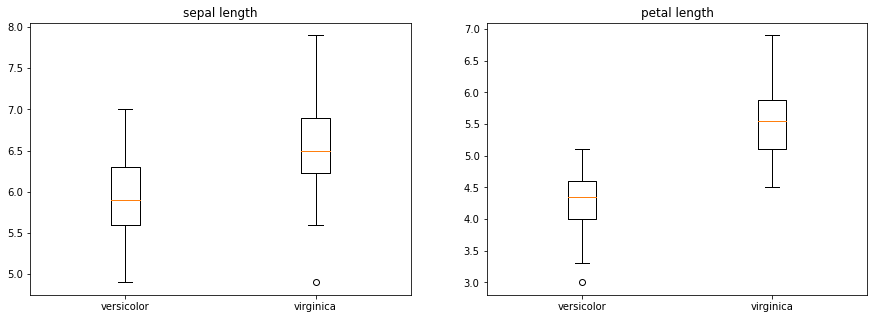

In [37]:
## Boxplot

fig = plt.figure(figsize=(15, 5))

import seaborn as sns

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df["variety"]==i+1]
        x.append(list(target_variety[x_features[feature]]))
        
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

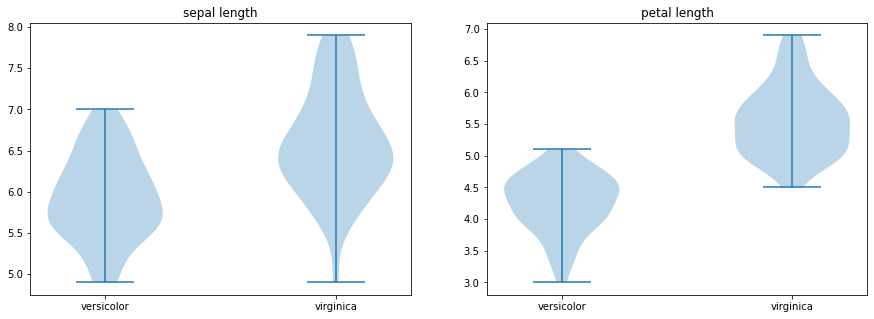

In [38]:
## Violinplot

fig = plt.figure(figsize=(15, 5))

import seaborn as sns

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df["variety"]==i+1]
        x.append(list(target_variety[x_features[feature]]))
        
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

# PROBLEM 3

Division of preprocessing/training data and verification data

In [51]:
from sklearn.model_selection import train_test_split

x = np.array(df.loc[:,["sepal length", "petal length"]])
y = np.array(df["variety"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# PROBLEM 4

Pretreatment/Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

# PROBLEM 5

Learning and estimation

In [53]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(x_train_trans, y_train.ravel())
pred_3 = k_neigh_3.predict(x_test_trans)
print("pred3 = ", pred_3)



k_neigh_5 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(x_train_trans, y_train.ravel())
pred_5 = k_neigh_5.predict(x_test_trans)
print("pred5 = ", pred_5)



k_neigh_1 = KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(x_train_trans, y_train.ravel())
pred_1 = k_neigh_1.predict(x_test_trans)
print("pred1 = ", pred_1)

pred3 =  [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
pred5 =  [1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
pred1 =  [1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


# PROBLEM 6

 Evaluation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

predictions = [pred_3, pred_5, pred_1]
keys = ["knn3", "knn5", "knn1"]

for a,prediction in enumerate(predictions,0):
    print("Predictions of ", keys[a])
    print("Accuracy =", accuracy_score(y_true=y_test,y_pred=prediction))
    print("Precision =", precision_score(y_true=y_test,y_pred=prediction,average=None))
    print("Recall =", recall_score(y_true=y_test,y_pred=prediction,average=None))
    print("f1 score =", f1_score(y_true=y_test,y_pred=prediction,average=None))
    print("Confusion matrix =", confusion_matrix(y_true=y_test,y_pred=prediction))
    print("----------------------------------------------------------------------------------")


Predictions of  knn3
Accuracy = 0.92
Precision = [1.         0.85714286]
Recall = [0.84615385 1.        ]
f1 score = [0.91666667 0.92307692]
Confusion matrix = [[11  2]
 [ 0 12]]
----------------------------------------------------------------------------------
Predictions of  knn5
Accuracy = 0.88
Precision = [1.  0.8]
Recall = [0.76923077 1.        ]
f1 score = [0.86956522 0.88888889]
Confusion matrix = [[10  3]
 [ 0 12]]
----------------------------------------------------------------------------------
Predictions of  knn1
Accuracy = 0.84
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]
----------------------------------------------------------------------------------


Explanations

Accuracy: Accuracy calculates the percentage of predicted values that match with actual values. For a record, if the predicted value is equal to the actual value, it is considered accurate.


Precision: is the ratio of correctly predicted positive observations to the total predicted positive observations.


Recall: is the ratio of correctly predicted positive observations in actual class.


F1 score: is the weighted avarage of precision and recall. Therefore, the score take both false positives and false negatives into account.

# PROBLEM 7

Visualization

In [55]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

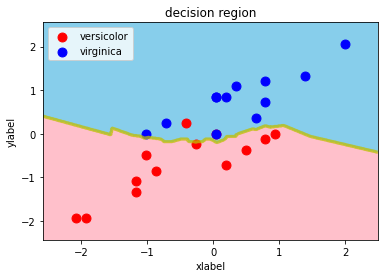

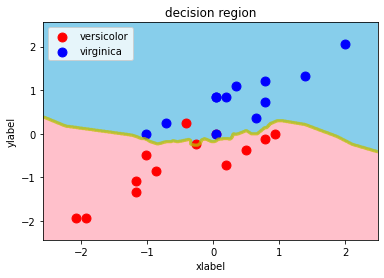

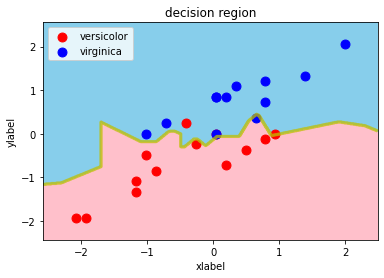

In [56]:
models = [k_neigh_3, k_neigh_5, k_neigh_1]
for a,model in enumerate(models, 1):
    decision_region(x_test_trans, y_test, model)

# PROBLEM 8

 Learning by other methods

In [57]:
def display_outputs(title,pred,model,std):
  print(title)
  print("Pred = ", pred)
  print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=pred))
  print("Precision =", precision_score(y_true=y_test,y_pred=prediction,average=None))
  print("Recall =", recall_score(y_true=y_test,y_pred=prediction,average=None))
  print("f1 score =", f1_score(y_true=y_test,y_pred=prediction,average=None))
  print("Confusion matrix =", confusion_matrix(y_true=y_test,y_pred=prediction))
  if (std == True):
    decision_region(x_test_trans, y_test, model)
  else:
    decision_region(x_test, y_test, model)
  print("----------------------------------------------------------------------------------")

Logical Regression
Pred =  [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Accuracy =  0.92
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


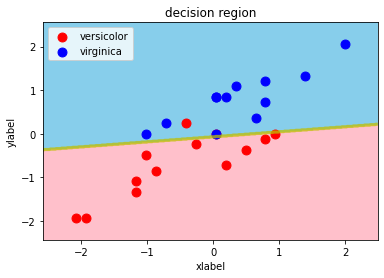

----------------------------------------------------------------------------------
svm
Pred =  [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Accuracy =  0.92
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


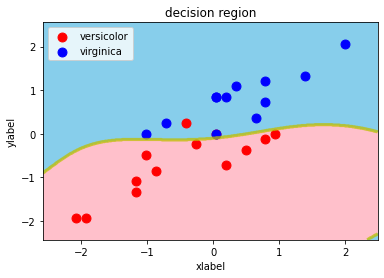

----------------------------------------------------------------------------------
Decision Tree
Pred =  [1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1]
Accuracy =  0.88
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


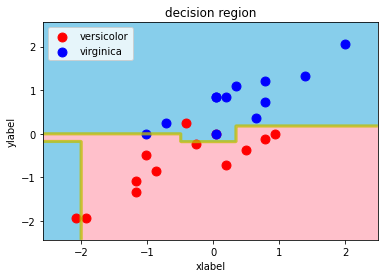

----------------------------------------------------------------------------------
Random Forest
Pred =  [2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Accuracy =  0.84
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


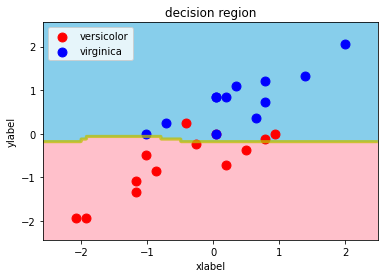

----------------------------------------------------------------------------------


In [58]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(x_train_trans, y_train)
lR_predict = lR_fit.predict(x_test_trans)
display_outputs("Logical Regression", lR_predict,lR_fit,std=True)


## svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
clf.fit(x_train_trans, y_train)
clf_pred = clf.predict(x_test_trans)
display_outputs("svm", clf_pred,clf,std=True)


## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans, y_train)
dTC_pred = dTC.predict(x_test_trans)
display_outputs("Decision Tree", dTC_pred,dTC,std=True)


## Random Forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train_trans, y_train)
rFC_pred = rFC.predict(x_test_trans)
display_outputs("Random Forest", rFC_pred,rFC,std=True)

 Comparison: All the methods have almost the same prediction results, but for SVM and logical regression has the same results withthe highest precision results which makes their results more precised.

# PROBLEM 9
(Advanced task) Comparison with and without standardization

knn
Pred =  [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Accuracy =  0.92
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


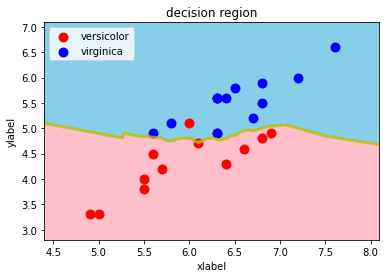

----------------------------------------------------------------------------------
Logical Regression
Pred =  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  0.48
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


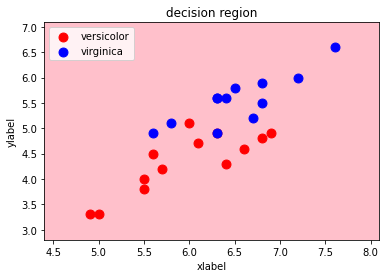

----------------------------------------------------------------------------------
SVM
Pred =  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  0.48
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


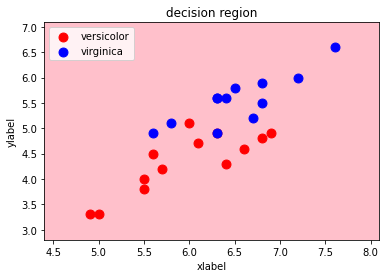

----------------------------------------------------------------------------------
Decision Tree
Pred =  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  0.48
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


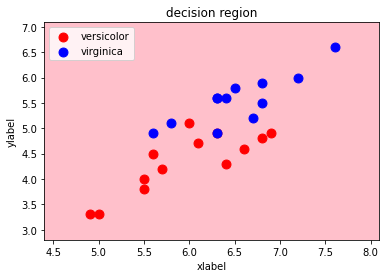

----------------------------------------------------------------------------------
Random Forest
Pred =  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  0.48
Precision = [0.90909091 0.78571429]
Recall = [0.76923077 0.91666667]
f1 score = [0.83333333 0.84615385]
Confusion matrix = [[10  3]
 [ 1 11]]


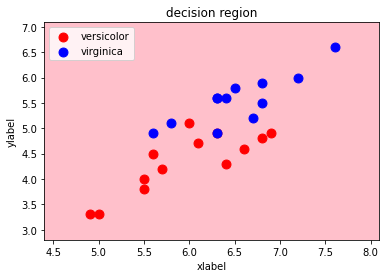

----------------------------------------------------------------------------------


In [59]:
# knn
k_neigh_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(x_train, y_train.ravel())
pred_3_2 = k_neigh_3_2.predict(x_test)
display_outputs("knn", pred_3_2,k_neigh_3_2,std=False)


## Logistic Regression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(x_train_trans, y_train)
lR_predict = lR_fit.predict(x_test)
display_outputs("Logical Regression",lR_predict,lR_fit,std=False)


## SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
clf.fit(x_train_trans, y_train)
clf_pred = clf.predict(x_test)
display_outputs("SVM", clf_pred,clf,std=False)


## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans, y_train)
dTC_pred = dTC.predict(x_test)
display_outputs("Decision Tree", dTC_pred,dTC,std=False)


## Random Forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train_trans, y_train)
rFC_pred = rFC.predict(x_test)
display_outputs("Random Forest", rFC_pred,rFC,std=False)

Standardization: is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

# PROBLEM 10

(Advanced task) Method with high accuracy using all objective variables

In [60]:
#Dataset preparation
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns=["target"])

#Cut the column name "cm"
cols = {x:x.replace(" (cm)", "") for x in X.columns}
X = X.rename(columns=cols)

#Select features and categories for practice
X = X[["sepal length", "petal length"]]

In [61]:
#Split training data and verification data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train, X_test, y_train, y_test = map(np.array, (X_train, X_test, y_train, y_test))
y_train = y_train.flatten()
y_test = y_test.flatten()

In [62]:
#Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [63]:
#Create a function to visualize the decision area
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned the ternary classification with 3D features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ["green", 'red', 'blue']
    contourf_color = ["yellow", 'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()





In [64]:
#Model creation and learning ⇒ Forecast
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)


lr3 = LogisticRegression()
lr3.fit(X_train, y_train)
lr3_pred = lr3.predict(X_test)



svc3 = SVC()
svc3.fit(X_train, y_train)
svc3_pred = svc3.predict(X_test)



tree3 = DecisionTreeClassifier()
tree3.fit(X_train, y_train)
tree3_pred = tree3.predict(X_test)



rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


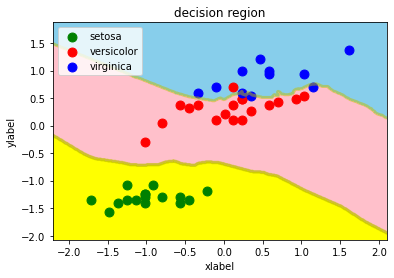

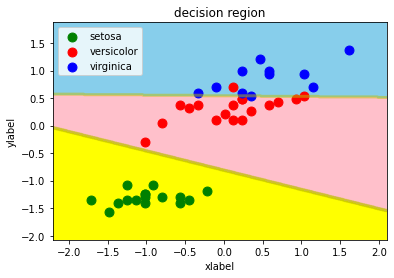

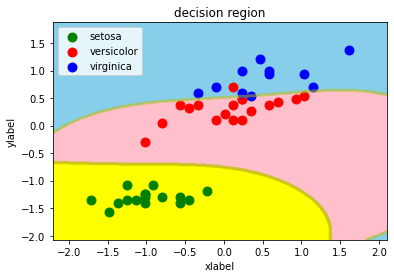

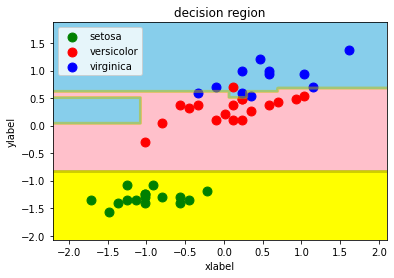

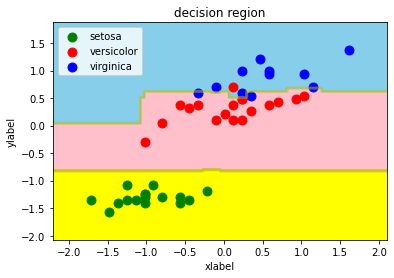

In [65]:
decision_region(X_test, y_test, knc)

decision_region(X_test, y_test, lr3)

decision_region(X_test, y_test, svc3)

decision_region(X_test, y_test, tree3)

decision_region(X_test, y_test, rfc)